Import Required Libraries

In [ ]:
import numpy as  np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso
from sklearn import metrics

Data Collection and Preprocessing

In [ ]:
df = pd.read_csv('/content/car data.csv')

In [ ]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
df.shape

(301, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


find missing values

In [ ]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

checking the distribution of catogorical data

In [ ]:
print(df.Fuel_Type.value_counts())
print(df.Seller_Type.value_counts())
print(df.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


Encoding the catogorical data

In [ ]:
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
df.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [ ]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


split x and y

In [ ]:
X = df.drop(['Car_Name','Selling_Price'],axis=1)
y = df['Selling_Price']

train test split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=2)

Model Selection

Linear Regression

In [ ]:
reg_model = LinearRegression()

In [ ]:
reg_model.fit(X_train,y_train)

LinearRegression()

Model evaluation - Linear Regression

In [ ]:
X_train_pred = reg_model.predict(X_train)
error_score = metrics.r2_score(y_train,X_train_pred)
print("R squared error:",error_score)

R squared error: 0.8799451660493711


In [ ]:
plt.scatter(y_train,X_train_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual price vs predicted price")
plt.show()

In [ ]:
X_test_pred = reg_model.predict(X_test)
error_score = metrics.r2_score(y_test,X_test_pred)
print("R squared error:",error_score)

R squared error: 0.8365766715027051


In [ ]:
plt.scatter(y_test,X_test_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual price vs predicted price")
plt.show()

Lasso

In [ ]:
lasso_model = Lasso()

In [ ]:
lasso_model.fit(X_train,y_train)

Lasso()

Model evaluation - Linear Regression

In [ ]:
X_train_pred = lasso_model.predict(X_train)
error_score = metrics.r2_score(y_train,X_train_pred)
print("R squared error:",error_score)

R squared error: 0.8427856123435794


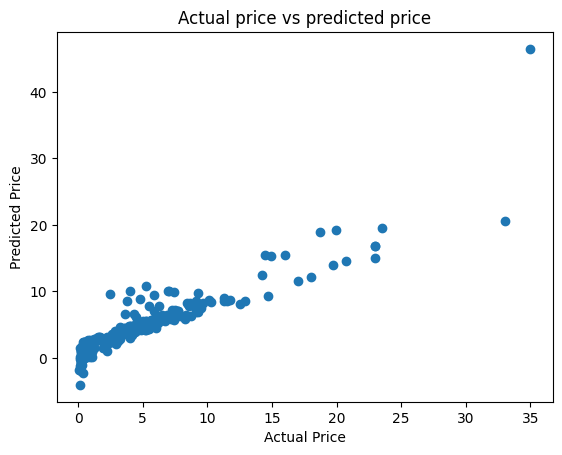

In [ ]:
plt.scatter(y_train,X_train_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual price vs predicted price")
plt.show()

In [ ]:
X_test_pred = lasso_model.predict(X_test)
error_score = metrics.r2_score(y_test,X_test_pred)
print("R squared error:",error_score)

R squared error: 0.8709167941173195


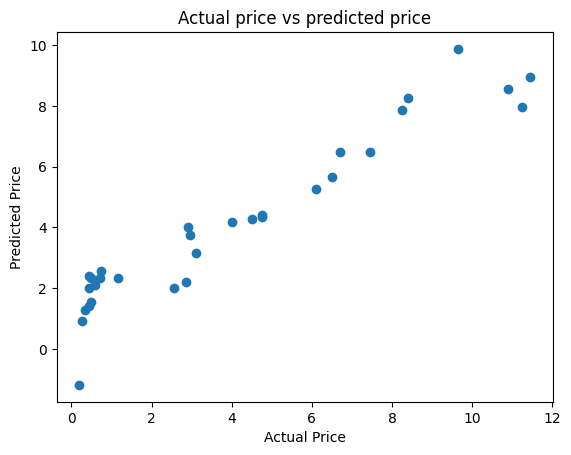

In [ ]:
plt.scatter(y_test,X_test_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual price vs predicted price")
plt.show()